# Real Estate Price-Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing=pd.read_csv("house_data.csv")

In [3]:
(housing.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285269,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705921,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.202000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#
import matplotlib.pyplot as plt

In [9]:
# housing.hist(bins=50 ,figsize=(20,15))
# plt.show()

## Train-Test Splitiing

In [10]:
#for only learning purpose
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set,test_set=split_train_test(housing,0.2)

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [13]:
print(len(train_set),"    ",len(test_set))

404      102


In [14]:
#eg=CHAS has only 1 and 0
# if all 0 go in train and all 1 in test our model will think that CHAS has only 1's
# thereby it will end giving wrong predictions about 1's
# Hence we use stratifiedshufflesplit

from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    
print(housing)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [15]:
strat_train_set["CHAS"].value_counts()


0    376
1     28
Name: CHAS, dtype: int64

In [16]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
corr_matrix=housing.corr()   #used for medv  , here probability fro which column effects the medv column the most
corr_matrix["MEDV"].sort_values(ascending=False)  

MEDV       1.000000
RM         0.696276
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [18]:
housing=strat_train_set.copy()

## Looking for Correlations 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013930A1C1C8>,
      dtype=object)

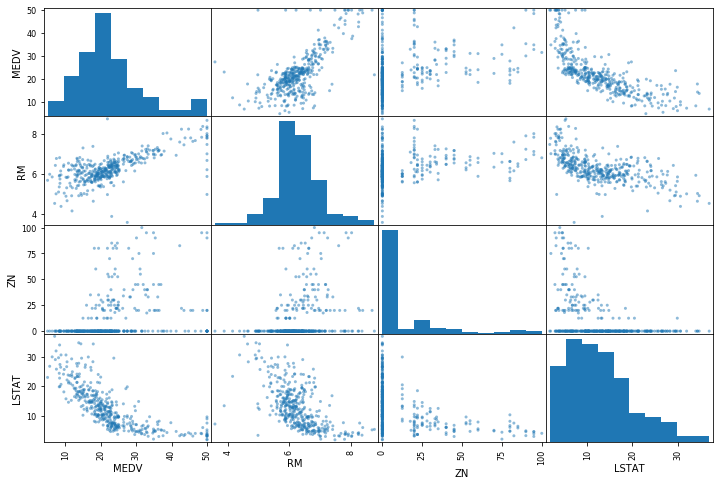

In [19]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

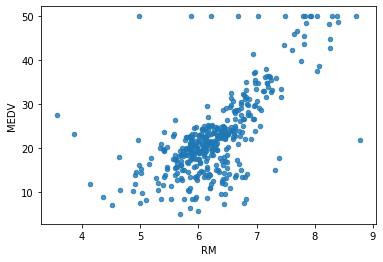

In [20]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8) #here we see the graph and check to remove the outliers(unmatching points)

                                                    #so that our data get clean and machine trains well

## Trying out Attribute Combinations

In [21]:
housing["TaxperRoom"]=housing["TAX"]/housing["RM"]
housing["TaxperRoom"].head()

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
Name: TaxperRoom, dtype: float64

In [22]:
corr_matrix=housing.corr()   #used for seeing how taxperroom effects and we see it is highly negative correlated hence imp. attribute
corr_matrix["MEDV"].sort_values(ascending=False)  

MEDV          1.000000
RM            0.680882
B             0.361761
ZN            0.339741
DIS           0.240451
CHAS          0.205066
AGE          -0.364596
RAD          -0.374693
CRIM         -0.393715
NOX          -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
TaxperRoom   -0.528922
LSTAT        -0.740494
Name: MEDV, dtype: float64

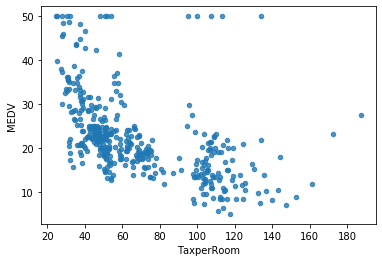

In [23]:
housing.plot(kind="scatter",x="TaxperRoom",y="MEDV",alpha=0.8)

In [24]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes

In [25]:
#To take care of missing attributes we have 3 options(Here we intentionally removed a few values from column RM)
# 1. Get rid of missing datapoints
# 2. Get rid of whole attribute column (Use only if that column has least correaltion , but here RM)
# 3. Set that value to 0 or mean value or median value 

In [26]:
#using above all original housing data remains unchanged only a copy is given and that is changed
#case 1:- 
# a=housing.dropna(subset=["RM"])
# a.shape


#case 2:- deleting entire RM column
#housing.drop("RM",axis=1)


#case 3:-
median=housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
housing.describe()   #before starting to fill missing values


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280472,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716314,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [28]:
from sklearn.impute import SimpleImputer # to fill null values that might also be in the test data or any new data
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X=imputer.transform(housing)

In [31]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [32]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279765,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712785,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## ScikitLearn Design

 Primarily 3 type of objects:-
     1:Estimaters= It estimates some parameter based on dataset (eg imputer). It has a 
         fit()=fits dataset and calc. internal parameters.
        
     2:Transformers= takes input and returns output based on the learning from fit().
         It also has convinience func. call fit_transform() that fits and transform together.
    
     3:Predictors= Eg= LinearRegression .  fit() and predict() are 2 of its common func. Ia also gives 
         score func. which will evaluate the predictions.

# Feature Scaling

Primarily 2 type of feature scaling models:-
    
    1) Min-max scaling //or// Normalisation======   class called MinmaxScaler
        = (Value-min)/(max-min)
    
    2) Standardization                     ======   class called StandardScaler
        =(Value-mean)/(Std.deviation)
    

# Creating Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #---- add as many as U want in your pipeline 
    ('std_scalar',StandardScaler())
])


In [34]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Estate Model

In [35]:
from sklearn.linear_model import LinearRegression  #gave higher error there next we using decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()

model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [37]:
prepare_data=my_pipeline.transform(some_data)

In [38]:
model.predict(prepare_data)

array([22.446, 25.626, 16.457, 23.475, 23.291])

In [39]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [40]:
#evaluating the model
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)


In [41]:
rmse

1.2571369788783424

Using Better evaluating technique Cross validation

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [43]:
rmse_scores

array([2.83951545, 2.7896861 , 4.36788928, 2.52539888, 3.30551606,
       2.63700425, 4.76865979, 3.2841146 , 3.14380544, 3.06271398])

In [44]:
def print_scores(scores):
    print("Scores=",scores)
    print("Mean=",scores.mean())
    print("Std. deviation=",scores.std())
    

In [45]:
print_scores(rmse_scores)

Scores= [2.83951545 2.7896861  4.36788928 2.52539888 3.30551606 2.63700425
 4.76865979 3.2841146  3.14380544 3.06271398]
Mean= 3.272430383114623
Std. deviation= 0.6987681290357289


In [46]:
#Saving the model

# Convert the code into python file and run the code using visual studio code

In [47]:
#Try Yourself

In [48]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

In [49]:
#Testing the model on test data

In [50]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
Final_predictions= model.predict(X_test_prepared)
Final_mse=mean_squared_error(Y_test,Final_predictions)
Final_rmse=np.sqrt(Final_mse)
print(Final_rmse)
print(Final_predictions,list(Y_test))

3.0666121675677385
[24.701 11.703 25.377 22.145 18.296 14.964 20.352 14.221 32.126 42.402
 19.455 12.118 24.399 28.314 19.601 11.159 31.714 14.398 23.857 18.807
 19.872 17.583 18.928 21.918 18.601 31.872 16.094 33.64   9.061 33.516
 23.81  21.278 22.959 11.384 21.091 11.53  44.214 24.441 23.325 41.412
 23.903 30.048 20.496 20.941 19.022 33.927 44.598 19.97  20.146 21.645
 21.082 14.591 21.512 14.775 25.026 33.285 40.854 29.305 19.345 20.83
 46.683  9.87  18.966 24.571 14.797 33.129 19.955 17.936 19.409 34.326
 26.007 23.173 21.336 22.394 35.087 12.991 15.71  20.045 20.658 21.476
 22.396 21.181 14.077 22.923 20.947 21.154 14.127 21.281 21.598 23.4
 18.46  27.103  7.159 26.553 18.668 29.197 19.954 31.255 14.271 26.913
 21.522 20.746] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 

In [51]:
prepare_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24127574, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

##USing the model

In [52]:
from joblib import dump,load
import numpy as np
model=load("Dragon.joblib")
input=np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24127574, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.446])